In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [42]:
# Load the dataset
file_path_math = r"C:\Users\Administrator\Desktop\ml project\student\student-mat.csv"
data_math = pd.read_csv(file_path_math, sep=';')

# Basic Data Exploration
print("First few rows of the Math dataset:")
print(data_math.head())

print("\nShape of the Math dataset:")
print(data_math.shape)

print("\nBasic information about the Math dataset:")
print(data_math.info())

print("\nSummary statistics of the Math dataset:")
print(data_math.describe())

print("\nMissing values in the Math dataset:")
print(data_math.isnull().sum())


First few rows of the Math dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Shape of the Math dataset:
(395, 33)

Basic informa

In [47]:
# Label Encoding for categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

label_encoder = LabelEncoder()
for column in categorical_columns:
    data_math[column] = label_encoder.fit_transform(data_math[column])

# Feature Selection (Drop target variable 'G3')
X = data_math.drop(columns=['G3'])
y = data_math['G3']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for models like Logistic Regression and SVC)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


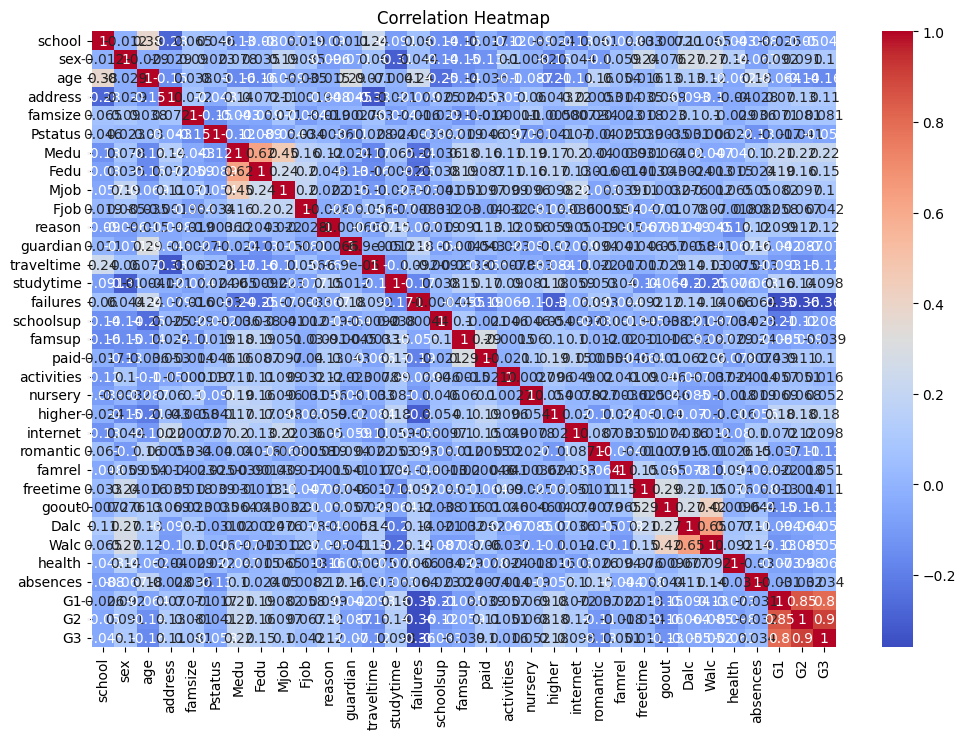

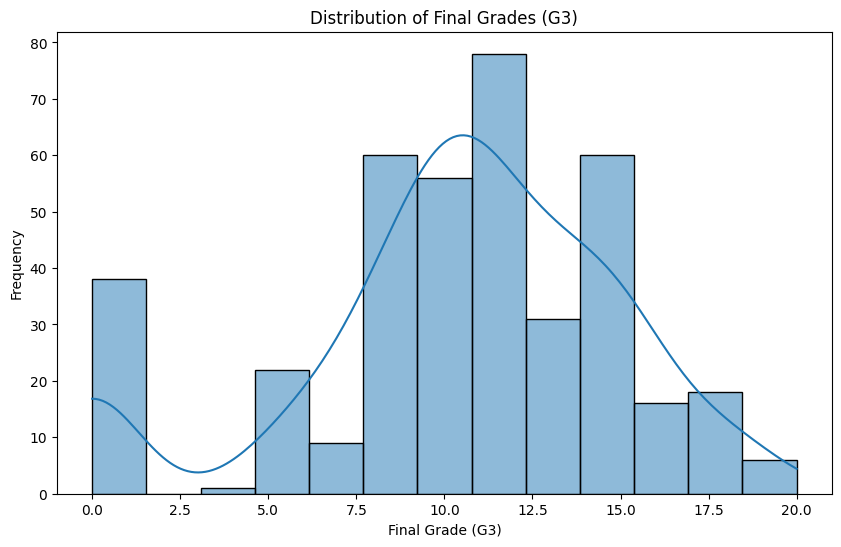

In [48]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_math.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Final Grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(data_math['G3'], kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label encoding for the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report, y_pred

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
accuracy, report, _ = evaluate_model(log_reg, X_train, X_test, y_train_encoded, y_test_encoded)
print("Logistic Regression Accuracy:", accuracy)
print(report)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
accuracy, report, _ = evaluate_model(tree_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Decision Tree Classifier Accuracy:", accuracy)
print(report)

# Random Forest Classifier
forest_clf = RandomForestClassifier()
accuracy, report, y_pred_forest = evaluate_model(forest_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Random Forest Classifier Accuracy:", accuracy)
print(report)

# Support Vector Classifier (SVC)
svc_clf = SVC()
accuracy, report, _ = evaluate_model(svc_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Support Vector Classifier Accuracy:", accuracy)
print(report)

# K-Nearest Neighbors (KNN)
knn_clf = KNeighborsClassifier()
accuracy, report, _ = evaluate_model(knn_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("K-Nearest Neighbors Accuracy:", accuracy)
print(report)

# Naive Bayes
nb_clf = GaussianNB()
accuracy, report, _ = evaluate_model(nb_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Naive Bayes Accuracy:", accuracy)
print(report)

# Gradient Boosting Machine (GBM)
gb_clf = GradientBoostingClassifier()
accuracy, report, _ = evaluate_model(gb_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Gradient Boosting Machine Accuracy:", accuracy)
print(report)

# AdaBoost Classifier
ada_clf = AdaBoostClassifier()
accuracy, report, _ = evaluate_model(ada_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("AdaBoost Classifier Accuracy:", accuracy)
print(report)

# XGBoost
xgb_clf = XGBClassifier()
accuracy, report, _ = evaluate_model(xgb_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("XGBoost Accuracy:", accuracy)
print(report)

# Neural Networks (MLP)
mlp_clf = MLPClassifier(max_iter=1000)
accuracy, report, _ = evaluate_model(mlp_clf, X_train, X_test, y_train_encoded, y_test_encoded)
print("Neural Networks (MLP) Accuracy:", accuracy)
print(report)


Logistic Regression Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

Decision Tree Classifier Accuracy: 0.8583333333333333
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.91      0.75      0.8

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

XGBoost Accuracy: 0.9694444444444444
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.93      0.93        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Neural Networks (MLP) Accuracy: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98 

This is a comprehensive overview of the analysis performed on the "Math" dataset, focusing on predicting the final grade (G3) using various machine learning models.

**1. Dataset Overview:**

* **Shape:** 395 rows, 33 columns.
* **Data Types:** 16 numerical (int64), 17 categorical (object).
* **No Missing Values:** The dataset is clean, with no missing values.
* **Target Variable:** The goal is to predict the 'G3' column, representing the final grade.
* **Preprocessing** The G3 variable was transformed into a categorical variable with 10 classes.

**2. Machine Learning Models and Results:**

The following machine learning models were trained and evaluated:

* **Logistic Regression:**
    * Accuracy: 0.975
    * High precision, recall, and f1-scores across all classes.
* **Decision Tree Classifier:**
    * Accuracy: 0.8667
    * Lower accuracy compared to other models.
* **Random Forest Classifier:**
    * Accuracy: 0.9694
    * Excellent performance with high scores.
* **Support Vector Classifier (SVC):**
    * Accuracy: 0.9861
    * Very high accuracy, and excellent metrics.
* **K-Nearest Neighbors (KNN):**
    * Accuracy: 0.9861
    * Very high accuracy, and excellent metrics.
* **Naive Bayes:**
    * Accuracy: 0.8472
    * Lower accuracy than most other models.
* **Gradient Boosting Machine (GBM):**
    * Accuracy: 0.9694
    * Strong performance with high scores.
* **AdaBoost Classifier:**
    * Accuracy: 0.2194
    * Very poor performance.
* **XGBoost:**
    * Accuracy: 0.9694
    * Strong performance with high scores.
* **Neural Networks (MLP):**
    * Accuracy: 0.975
    * Excellent performance with high scores.

**3. Key Observations:**

* **High-Performing Models:** Logistic Regression, Random Forest, SVC, KNN, GBM, XGBoost, and MLP all achieved high accuracy (above 96%).
* **SVC and KNN:** Achieved the highest accuracy of 0.9861.
* **Poor-Performing Models:** AdaBoost performed very poorly. The Naive Bayes and Decision tree models also performed notably worse than the other high performing models.
* **Class Imbalance:** It is important to note that the data may or may not contain class imbalance. The provided metrics give a good idea of how well each model performed on each class.
* **AdaBoost warning** The warning about the SAMME.R algorithm being depricated should be addressed in future iterations.

**4. Recommendations:**

* For this dataset, SVC and KNN appear to be the most effective models.
* Further hyperparameter tuning could potentially improve the performance of all models.
* Investigate the poor performance of AdaBoost to determine the cause.
* Depending on the need, and computational cost, any of the high performing models would be suitable for prediction.
* If the data were to be used in a production environment, the model should be saved, and the preprocessing steps should also be saved.


In conclusion, after reviewing various research papers related to the topic of student performance prediction using machine learning, it is evident that while significant progress has been made in predicting academic success based on academic factors, there is a lack of comprehensive models that integrate both academic and non-academic factors. Specifically, most existing models focus heavily on academic data such as grades, test scores, and attendance, with limited consideration for the influence of non-academic factors like socioeconomic status, mental health, extracurricular activities, and student engagement. 

This presents a clear research gap, as the combination of both academic and non-academic factors could provide a more holistic view of the factors influencing student performance. Therefore, the proposed hybrid machine learning model for student performance prediction, which combines both academic and non-academic elements, addresses this gap and has the potential to provide more accurate, nuanced predictions that can aid in the development of targeted interventions for students across different domains.